In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("A:\\dataset\\cardio\\cardio_train.csv")

In [3]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
data.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler=StandardScaler()
scaler.fit(data.drop('cardio',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [8]:
scaler_features=scaler.transform(data.drop('cardio',axis=1))

In [9]:
df=pd.DataFrame(scaler_features,columns=data.columns[:-1])

In [10]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,-1.732080,-0.436062,1.364055,0.443452,-0.847873,-0.122182,-0.088238,-0.539322,-0.39572,-0.310879,-0.238384,0.494167
1,-1.732046,0.307686,-0.733108,-1.018168,0.749831,0.072610,-0.035180,2.400793,-0.39572,-0.310879,-0.238384,0.494167
2,-1.732011,-0.247997,-0.733108,0.078047,-0.708942,0.007679,-0.141297,2.400793,-0.39572,-0.310879,-0.238384,-2.023607
3,-1.731976,-0.748152,1.364055,0.565254,0.541435,0.137541,0.017879,-0.539322,-0.39572,-0.310879,-0.238384,0.494167
4,-1.731942,-0.808543,-0.733108,-1.018168,-1.264666,-0.187113,-0.194356,-0.539322,-0.39572,-0.310879,-0.238384,-2.023607


In [11]:
X=scaler_features
y=data['cardio']

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.40)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)

In [15]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [16]:
pred=knn.predict(X_test)

In [17]:
from sklearn.metrics import classification_report,confusion_matrix

In [18]:
print(confusion_matrix(y_test,pred))

[[8468 5409]
 [6214 7909]]


In [19]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.58      0.61      0.59     13877
           1       0.59      0.56      0.58     14123

    accuracy                           0.58     28000
   macro avg       0.59      0.59      0.58     28000
weighted avg       0.59      0.58      0.58     28000



In [20]:
error_rate=[]
for i in range (1,21):
    knn=KNeighborsClassifier(n_neighbors=i)# first start with 1
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))#whenever the pred value not matching the y_test value,i am going to find out mean of the results,once i getting the mean value to find the error rate.

In [21]:
print(error_rate)

[0.41510714285714284, 0.4205357142857143, 0.38817857142857143, 0.39464285714285713, 0.3771785714285714, 0.3846785714285714, 0.37189285714285714, 0.3737142857142857, 0.3682142857142857, 0.3687857142857143, 0.3630357142857143, 0.36607142857142855, 0.3596785714285714, 0.36207142857142854, 0.3598928571428571, 0.363, 0.3595714285714286, 0.3615357142857143, 0.3567142857142857, 0.35925]


In [22]:
X_train.shape

(42000, 12)

In [23]:
y_train.shape

(42000,)

In [24]:
X_test.shape

(28000, 12)

In [25]:
y_test.shape

(28000,)

Text(0, 0.5, 'Error_Rate')

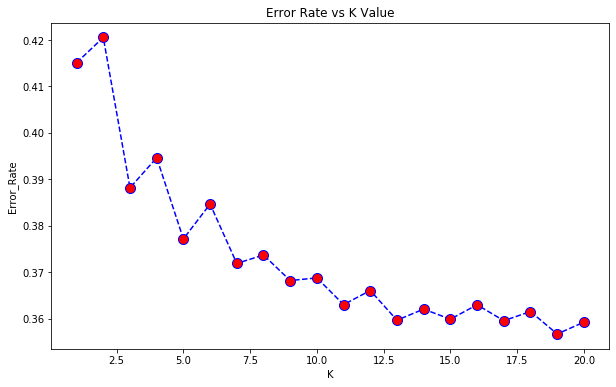

In [26]:
plt.figure(figsize=(10,6))
plt.errorbar(range(1,21),error_rate,color='blue',linestyle='dashed',marker='o',
         markerfacecolor='red',markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel("K")
plt.ylabel("Error_Rate")

In [35]:
knn=KNeighborsClassifier(n_neighbors=18)
knn.fit(X_train,y_train)
pred_i=knn.predict(X_test)

In [36]:
print(confusion_matrix(y_test,pred_i))

[[10077  3800]
 [ 6323  7800]]


In [37]:
print(classification_report(y_test,pred_i))

              precision    recall  f1-score   support

           0       0.61      0.73      0.67     13877
           1       0.67      0.55      0.61     14123

    accuracy                           0.64     28000
   macro avg       0.64      0.64      0.64     28000
weighted avg       0.64      0.64      0.64     28000



In [34]:
data.shape

(70000, 13)